# 1. Install Ultralytics Library 

In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3

# 2. Import YOLO and Load Pretrained Model 

In [2]:
from ultralytics import YOLO

# Load a pretrained YOLOv11s segmentation model
model = YOLO("yolo11s-seg.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 19.7M/19.7M [00:00<00:00, 160MB/s]


# 3. Train the Model with Early Stopping 

In [3]:
train_results = model.train(
    data="/kaggle/input/brats-instance-seg/data.yaml",  # Path to your dataset YAML file
    epochs=200,               # Number of epochs for training
    imgsz=640,                # Input image size
    batch=8,                  # Batch size (adjust if needed based on GPU memory)
    lr0=0.0015,               # Lower learning rate for stability
    optimizer="SGD",          # Use SGD optimizer (recommended for YOLO)
    patience=30,              # Early stopping if no improvement for 30 epochs
    mosaic=0.0,               # Disable mosaic augmentation (not suitable for medical data)
    cache=True,               # Cache dataset in memory for faster training
    workers=4                 # Use 4 dataloader workers for faster data loading
)

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/brats-instance-seg/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0015, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose

100%|██████████| 755k/755k [00:00<00:00, 16.2MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.5 ms, read: 4.4±1.2 MB/s, size: 26.5 KB)


train: Scanning /kaggle/input/brats-instance-seg/train/labels... 6435 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6435/6435 [00:31<00:00, 204.82it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/brats-instance-seg/train is not writeable, cache not saved.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (7.4GB RAM): 100%|██████████| 6435/6435 [00:12<00:00, 502.30it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 5.2±1.5 MB/s, size: 26.5 KB)


val: Scanning /kaggle/input/brats-instance-seg/valid/labels... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:03<00:00, 200.96it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/brats-instance-seg/valid is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.7GB RAM): 100%|██████████| 613/613 [00:01<00:00, 510.21it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: SGD(lr=0.0015, momentum=0.937) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.54G      1.368      2.368      3.316      1.413          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.49it/s]


                   all        613        613      0.471      0.551      0.485       0.32      0.478      0.528      0.483      0.307

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.05G      1.166      1.866      1.539      1.169          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.58it/s]

                   all        613        613      0.619       0.66      0.674      0.453      0.612      0.657      0.669      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.08G      1.112      1.744       1.24      1.113          3        640: 100%|██████████| 805/805 [02:48<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.60it/s]

                   all        613        613      0.691      0.638      0.709       0.47        0.7      0.643      0.719      0.453



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.11G      1.097      1.682      1.104      1.086          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all        613        613      0.699      0.637      0.723      0.485      0.698      0.636       0.72      0.464



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.14G      1.044      1.596     0.9712      1.056          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.63it/s]

                   all        613        613      0.692      0.691      0.727      0.492      0.692      0.689      0.722      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.17G      1.004      1.531     0.8578      1.025          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.59it/s]

                   all        613        613      0.736      0.711      0.773      0.522      0.749      0.679      0.766      0.498



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/200       3.2G     0.9655      1.468     0.7835      1.014          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all        613        613      0.772      0.704      0.779      0.532      0.772      0.713      0.781      0.503



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.23G     0.9354      1.424     0.7028     0.9898          3        640: 100%|██████████| 805/805 [02:48<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.77it/s]

                   all        613        613      0.805      0.722      0.805      0.554      0.804      0.722      0.798      0.525



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.26G     0.8993      1.375     0.6554     0.9738          3        640: 100%|██████████| 805/805 [02:46<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.91it/s]

                   all        613        613      0.772      0.735      0.807       0.55      0.766      0.749      0.808      0.526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.29G     0.8828      1.344      0.611     0.9601          3        640: 100%|██████████| 805/805 [02:47<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all        613        613      0.746      0.735      0.798      0.541      0.746      0.744      0.796      0.515



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/200      3.32G     0.8556      1.309     0.5714     0.9474          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.59it/s]

                   all        613        613      0.797      0.708      0.801       0.55      0.799      0.709      0.798      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/200      3.35G     0.8326      1.276     0.5361     0.9342          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.56it/s]

                   all        613        613      0.802      0.742       0.82      0.552      0.794      0.735       0.81      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/200      3.38G     0.8112      1.243     0.5059     0.9329          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.742      0.753      0.787      0.537       0.75      0.747      0.788      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/200       3.4G     0.7969      1.223     0.4938     0.9251          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all        613        613       0.81      0.775      0.823      0.564      0.814      0.779      0.825       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.43G     0.7748      1.187     0.4705     0.9156          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.68it/s]

                   all        613        613      0.798      0.771      0.825      0.572      0.802      0.773      0.824       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.46G     0.7587      1.178     0.4512     0.9044          3        640: 100%|██████████| 805/805 [02:48<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

                   all        613        613      0.795      0.784      0.828      0.577        0.8      0.786      0.826      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/200      3.49G     0.7396      1.151     0.4397     0.8973          3        640: 100%|██████████| 805/805 [02:48<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.69it/s]

                   all        613        613      0.748      0.794       0.82       0.57      0.758      0.803      0.826       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.52G      0.726      1.133     0.4227     0.8902          3        640: 100%|██████████| 805/805 [02:47<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.65it/s]

                   all        613        613      0.817      0.744       0.82      0.561       0.83      0.755      0.835      0.537



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.55G     0.7045      1.105     0.4125      0.887          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.72it/s]

                   all        613        613      0.777      0.781      0.819      0.568      0.778      0.782      0.813      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/200      3.58G     0.7009      1.089     0.4069     0.8829          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all        613        613      0.823      0.738      0.826       0.57      0.841      0.731       0.83      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/200      3.61G     0.6777      1.066     0.3962     0.8754          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all        613        613       0.75      0.794      0.822      0.559      0.742      0.796      0.824      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.64G      0.668      1.051      0.389     0.8809          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.56it/s]

                   all        613        613      0.797      0.752      0.806      0.557      0.798      0.752      0.804      0.534



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.66G     0.6635      1.035     0.3769     0.8712          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.796      0.783      0.822      0.578      0.807      0.777      0.824      0.557



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.69G     0.6512      1.024     0.3671     0.8691          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.813      0.778      0.829      0.574      0.812      0.777      0.829      0.553



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.72G     0.6378      1.013     0.3605     0.8646          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.855       0.76       0.84      0.592      0.857      0.759       0.84      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.75G     0.6243     0.9923     0.3539     0.8578          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613       0.87      0.743      0.851      0.595      0.841       0.77      0.851      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/200      3.78G     0.6165     0.9838     0.3444     0.8605          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.53it/s]

                   all        613        613       0.83      0.796      0.835      0.586       0.83      0.791      0.833      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.81G     0.6013      0.962     0.3375     0.8538          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all        613        613      0.805       0.81      0.858        0.6      0.829      0.779      0.854      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.84G     0.5965     0.9496     0.3253     0.8465          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.63it/s]

                   all        613        613      0.836      0.754      0.838      0.592       0.84       0.76      0.836      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.87G     0.5832     0.9356     0.3245     0.8463          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all        613        613      0.807      0.782      0.833      0.579      0.864      0.741       0.83      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/200       3.9G     0.5801     0.9291     0.3222     0.8426          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.64it/s]

                   all        613        613      0.817      0.786      0.833      0.588      0.811      0.789      0.832      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.93G     0.5713     0.9172     0.3229     0.8432          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.831      0.776      0.831      0.592      0.836      0.781      0.841      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.96G      0.563     0.9087     0.3151     0.8396          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.76it/s]

                   all        613        613       0.79      0.764      0.822      0.583      0.806      0.778      0.833      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.98G     0.5506     0.8915     0.3125     0.8356          3        640: 100%|██████████| 805/805 [02:48<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.55it/s]

                   all        613        613      0.859      0.732      0.844      0.603      0.825      0.759      0.843       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.01G     0.5404     0.8831     0.3024     0.8299          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.801      0.792      0.835      0.588      0.812      0.798      0.838      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/200      4.04G      0.534     0.8767     0.2979     0.8306          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.59it/s]

                   all        613        613      0.809      0.786      0.848      0.604      0.806      0.783      0.848      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.07G      0.529     0.8701     0.2983     0.8235          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.824      0.777      0.837      0.588      0.821      0.775      0.838      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/200       4.1G     0.5255     0.8555     0.2949      0.828          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.60it/s]

                   all        613        613      0.837      0.797      0.859        0.6      0.835      0.796      0.856       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/200      4.13G      0.515     0.8424      0.291     0.8171          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.42it/s]

                   all        613        613      0.826      0.775      0.835      0.585       0.83      0.779      0.839      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/200      4.16G     0.5126     0.8435     0.2937     0.8214          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.64it/s]

                   all        613        613      0.751      0.804      0.831      0.586       0.82      0.743       0.83      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.19G      0.505     0.8283     0.2881     0.8214          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613       0.79      0.778      0.822      0.573      0.788       0.77      0.813      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.22G     0.4946     0.8208     0.2809     0.8205          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.72it/s]

                   all        613        613      0.857      0.758      0.856      0.597      0.847      0.752      0.848      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/200      4.25G     0.4975     0.8205     0.2774     0.8203          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

                   all        613        613      0.814      0.798      0.844      0.597      0.818      0.801      0.841      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.28G      0.487     0.8046     0.2763     0.8165          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.59it/s]

                   all        613        613      0.791      0.818      0.842      0.599       0.83      0.781      0.847      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/200       4.3G     0.4848     0.8055     0.2724     0.8155          3        640: 100%|██████████| 805/805 [02:55<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.49it/s]

                   all        613        613      0.782      0.796      0.836      0.592      0.845      0.744      0.837      0.571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/200      4.33G     0.4804     0.7903     0.2728     0.8177          3        640: 100%|██████████| 805/805 [02:55<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.60it/s]

                   all        613        613      0.858      0.782      0.852      0.612      0.861      0.785      0.855      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.36G     0.4714     0.7842     0.2662     0.8135          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.55it/s]

                   all        613        613      0.846      0.761      0.832      0.584      0.848      0.761      0.827      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/200      4.39G     0.4643     0.7737     0.2617      0.813          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.46it/s]

                   all        613        613      0.803      0.807      0.845      0.605      0.802      0.807      0.846      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/200      4.42G     0.4576     0.7694     0.2623     0.8086          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.52it/s]

                   all        613        613      0.798      0.798       0.83      0.592      0.795      0.801      0.831       0.57



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/200      4.45G     0.4538     0.7619      0.258     0.8097          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all        613        613      0.855      0.761      0.851      0.609      0.858      0.764      0.852      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.48G     0.4514     0.7575     0.2618     0.8085          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.68it/s]

                   all        613        613      0.817      0.786      0.837      0.602      0.851      0.776      0.845       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/200      4.51G     0.4463     0.7478     0.2583     0.8062          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.45it/s]

                   all        613        613      0.869      0.768      0.848      0.604      0.872      0.769       0.85      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/200      4.54G     0.4463     0.7475     0.2565     0.8082          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.60it/s]

                   all        613        613      0.837      0.793      0.848      0.608      0.838      0.794      0.845      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/200      4.57G     0.4402     0.7328     0.2528     0.8073          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all        613        613      0.833      0.796      0.845      0.603      0.832      0.796      0.848      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.59G     0.4331     0.7266     0.2477     0.8058          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all        613        613      0.839      0.793      0.853      0.607       0.84      0.794       0.85      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/200      4.62G     0.4305     0.7303     0.2495     0.8039          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.828      0.783      0.847      0.599       0.89      0.735      0.847      0.576



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/200      4.65G     0.4238     0.7175     0.2434     0.7999          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all        613        613      0.858       0.78      0.853      0.614      0.859       0.78      0.846      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/200      4.68G     0.4226     0.7125     0.2444     0.8015          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613      0.864       0.79       0.86      0.619      0.859      0.786      0.856      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/200      4.71G     0.4215     0.7102     0.2428     0.8001          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all        613        613      0.859      0.791      0.847      0.616       0.86      0.792      0.848      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/200      4.74G     0.4129     0.7011     0.2414     0.7979          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.45it/s]

                   all        613        613      0.873      0.775      0.858      0.623       0.88      0.783      0.863      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/200      4.77G     0.4084     0.6983     0.2393     0.7988          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.63it/s]

                   all        613        613       0.87      0.788      0.861       0.62       0.87      0.789      0.859      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/200       4.8G     0.4076     0.6928     0.2366      0.798          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all        613        613      0.872       0.78      0.862      0.627      0.871      0.777      0.853      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/200      4.83G     0.4031     0.6869     0.2385     0.7998          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.53it/s]

                   all        613        613      0.844      0.798      0.851      0.618      0.888      0.767      0.854      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/200      4.86G     0.3988     0.6861     0.2344     0.7978          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.69it/s]

                   all        613        613      0.822      0.793      0.845      0.616      0.819       0.79      0.844      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/200      4.88G     0.3958     0.6712     0.2302     0.7964          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.867      0.749      0.851      0.617      0.869      0.749      0.844      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/200      4.93G     0.3954     0.6755      0.227     0.7952          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.69it/s]

                   all        613        613      0.846      0.769      0.856      0.625      0.842      0.764      0.851      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.96G     0.3903     0.6679     0.2265     0.7953          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.867       0.76      0.856      0.625      0.868      0.761      0.858        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/200      4.99G     0.3896     0.6651      0.231     0.7935          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.857      0.766      0.854      0.621       0.86      0.769      0.858      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/200      5.04G     0.3847     0.6568     0.2269     0.7928          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.835      0.789      0.858      0.621      0.837      0.792      0.857        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/200      5.07G      0.382     0.6516     0.2237     0.7919          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.54it/s]

                   all        613        613      0.827       0.78      0.858       0.62      0.824      0.779      0.858      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/200      5.11G     0.3824     0.6527      0.225     0.7955          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.60it/s]

                   all        613        613      0.869      0.765      0.857      0.616      0.864      0.761      0.853      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/200      5.16G     0.3719     0.6399      0.222     0.7902          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.60it/s]

                   all        613        613      0.808      0.806      0.851      0.614      0.843      0.766      0.848      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/200      5.19G     0.3712     0.6459     0.2217     0.7914          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.76it/s]

                   all        613        613      0.873      0.762      0.855      0.624      0.871       0.76      0.855      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/200      5.23G      0.364     0.6334     0.2156       0.79          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.864      0.765      0.851      0.616      0.856      0.757      0.842      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/200      5.26G     0.3617     0.6285     0.2132     0.7884          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all        613        613      0.846      0.794       0.85      0.619      0.858      0.782       0.85      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/200      5.31G     0.3633     0.6236     0.2175     0.7913          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.845      0.772      0.845      0.616       0.84       0.78      0.848      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/200      5.36G     0.3559     0.6139      0.213     0.7883          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613       0.85      0.783      0.851      0.623       0.85      0.783      0.852      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/200       5.4G     0.3595     0.6193     0.2152     0.7895          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.80it/s]

                   all        613        613      0.832      0.821      0.859       0.63      0.845      0.802      0.856      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/200      5.43G     0.3539     0.6106     0.2104      0.787          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.854       0.79      0.855       0.62      0.847      0.783      0.851      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/200      5.46G     0.3522     0.6071     0.2117     0.7907          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.65it/s]

                   all        613        613      0.872      0.784      0.852      0.617      0.867       0.78      0.847      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/200      5.51G     0.3486     0.5991     0.2087      0.788          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.65it/s]

                   all        613        613      0.828      0.804      0.855      0.622      0.829      0.794      0.852      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/200      5.54G     0.3467     0.6061     0.2084     0.7859          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.79it/s]

                   all        613        613      0.802      0.815      0.846      0.616       0.84      0.772      0.844      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/200      5.58G     0.3431     0.5998     0.2059     0.7867          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.856      0.767      0.846      0.611      0.854      0.765      0.844      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/200      5.63G       0.34     0.5956     0.2058     0.7856          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.77it/s]

                   all        613        613      0.809      0.817      0.846       0.61      0.798      0.808      0.841      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/200      5.66G     0.3414     0.5897     0.2042     0.7877          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.63it/s]

                   all        613        613      0.834      0.806      0.853       0.62      0.808       0.81      0.847      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/200      5.71G     0.3347     0.5852     0.2019     0.7845          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.72it/s]

                   all        613        613      0.858       0.79      0.858      0.624      0.849      0.783      0.853      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/200      5.73G     0.3324     0.5828     0.2024     0.7827          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.76it/s]

                   all        613        613      0.829      0.807      0.855      0.618      0.819      0.796      0.847      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/200      5.78G     0.3313     0.5771     0.2023     0.7843          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.80it/s]

                   all        613        613      0.846      0.792      0.851      0.615      0.834      0.782      0.844       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/200      5.81G     0.3302     0.5728     0.2007     0.7833          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.79it/s]

                   all        613        613       0.85      0.797      0.854      0.623      0.841       0.79      0.848      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/200      5.88G     0.3281     0.5756     0.1976     0.7854          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.81it/s]

                   all        613        613      0.854      0.794      0.861      0.626      0.853       0.79      0.857      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/200       5.9G     0.3261     0.5691     0.1993     0.7818          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:07<00:00,  4.88it/s]

                   all        613        613      0.862      0.784      0.856      0.623      0.858      0.781      0.852      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/200      5.93G      0.326     0.5707     0.2016     0.7813          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.79it/s]

                   all        613        613       0.86       0.78      0.858      0.621      0.857      0.778      0.856      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/200      5.98G     0.3233     0.5612     0.1969     0.7807          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

                   all        613        613      0.854      0.791      0.864      0.628      0.848      0.787       0.86      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/200      6.01G     0.3198     0.5573     0.1951     0.7823          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.858      0.786      0.862      0.628      0.853      0.781      0.858      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/200      6.05G      0.319     0.5594     0.1953     0.7819          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613       0.86      0.777      0.859      0.623      0.859      0.774      0.857      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/200       6.1G     0.3142     0.5519      0.193     0.7809          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.78it/s]

                   all        613        613       0.85      0.782      0.858      0.624      0.842      0.776      0.852        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/200      6.15G     0.3132     0.5516     0.1941     0.7819          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.78it/s]

                   all        613        613      0.837      0.789      0.852       0.62      0.832      0.784      0.846      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/200      6.18G     0.3126     0.5509     0.1917     0.7819          3        640: 100%|██████████| 805/805 [02:49<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613       0.84      0.779      0.852      0.616      0.835      0.773      0.844      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/200      6.21G     0.3105     0.5521     0.1907     0.7793          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.809      0.797      0.848      0.613      0.821      0.776      0.844       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/200      6.25G     0.3087     0.5463     0.1911     0.7852          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613      0.819      0.799      0.849      0.614      0.816      0.784      0.842      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/200       6.3G     0.3026     0.5379     0.1875     0.7781          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.81it/s]

                   all        613        613      0.838      0.781      0.849      0.616      0.839      0.772      0.843      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    102/200      6.33G      0.304      0.538     0.1879     0.7798          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.65it/s]

                   all        613        613      0.835      0.781      0.848      0.618      0.834       0.78      0.844       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    103/200      6.38G     0.3037     0.5376     0.1882     0.7816          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.69it/s]

                   all        613        613      0.822      0.795       0.85      0.619      0.868      0.752       0.85      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    104/200       6.4G     0.3017     0.5325       0.19     0.7782          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.72it/s]

                   all        613        613      0.842      0.787       0.85      0.617      0.855      0.767      0.845      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    105/200      6.45G     0.2996     0.5327     0.1871      0.778          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.83it/s]

                   all        613        613      0.838      0.791       0.85      0.616      0.842      0.778      0.843      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    106/200       6.5G     0.2975     0.5246     0.1861     0.7796          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.79it/s]

                   all        613        613      0.842      0.794      0.849      0.615      0.833      0.786      0.841      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    107/200      6.53G     0.2947     0.5225     0.1842     0.7787          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.65it/s]

                   all        613        613      0.861      0.778      0.843      0.617      0.854       0.77      0.838      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    108/200      6.57G     0.2945      0.517     0.1839     0.7767          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.844      0.779      0.839      0.615      0.832      0.783      0.838      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    109/200      6.62G     0.2925     0.5225     0.1821     0.7752          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.61it/s]

                   all        613        613      0.824      0.808      0.846      0.622      0.816      0.802      0.841      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    110/200      6.65G     0.2929     0.5188     0.1815     0.7772          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.79it/s]

                   all        613        613      0.845      0.792      0.846      0.621      0.848      0.776       0.84      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    111/200      6.68G     0.2894     0.5158     0.1818     0.7793          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.855      0.776      0.847      0.618       0.85      0.773       0.84      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    112/200      6.72G     0.2857     0.5113      0.181     0.7746          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.61it/s]

                   all        613        613      0.816      0.806       0.85       0.62      0.847      0.765      0.842      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    113/200      6.88G     0.2823     0.5112     0.1801     0.7759          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.842      0.785      0.852      0.622      0.837       0.78      0.847      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    114/200      6.91G     0.2839     0.5059     0.1799     0.7768          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.80it/s]

                   all        613        613      0.846      0.789      0.852      0.622      0.837      0.779      0.847      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    115/200      6.94G     0.2808     0.5056     0.1761      0.776          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.82it/s]

                   all        613        613      0.848      0.797      0.855      0.625      0.838      0.788      0.848        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    116/200      6.97G      0.281     0.5015      0.175     0.7767          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.85it/s]

                   all        613        613      0.842      0.795      0.856      0.625      0.855      0.775      0.852      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    117/200         7G     0.2773     0.4998     0.1771     0.7755          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

                   all        613        613      0.859      0.776      0.858      0.628      0.853       0.77      0.851      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    118/200      7.03G     0.2738     0.4972     0.1754      0.774          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.61it/s]

                   all        613        613      0.809      0.818      0.856      0.631      0.807      0.816      0.854      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    119/200      7.06G     0.2763     0.4934     0.1748     0.7763          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.812      0.824      0.855       0.63      0.808       0.82      0.852      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    120/200      7.09G     0.2698     0.4919     0.1715     0.7723          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.811      0.821      0.856      0.631      0.807      0.817      0.855      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    121/200      7.12G     0.2733     0.4939     0.1723     0.7732          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.54it/s]

                   all        613        613      0.818      0.821      0.856      0.629      0.815      0.816      0.852      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    122/200      7.15G     0.2702     0.4907     0.1712     0.7775          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.72it/s]

                   all        613        613      0.815      0.821      0.855      0.626      0.809      0.815       0.85      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    123/200      7.18G     0.2681     0.4903     0.1707     0.7757          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.83it/s]

                   all        613        613      0.813      0.823      0.856      0.626      0.806      0.817      0.851      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    124/200      7.21G     0.2661      0.488     0.1716     0.7748          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613      0.846      0.794      0.855      0.624      0.839      0.788      0.851      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    125/200      7.23G     0.2647      0.482     0.1702     0.7749          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.58it/s]

                   all        613        613       0.86       0.78      0.856      0.625      0.855      0.776      0.853      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    126/200      7.28G     0.2659     0.4833     0.1708     0.7729          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all        613        613       0.85       0.79      0.858      0.627       0.85      0.777      0.852      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    127/200      7.31G     0.2628     0.4826     0.1679     0.7752          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.53it/s]

                   all        613        613      0.855      0.792      0.858      0.627      0.848       0.78      0.852      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    128/200      7.36G     0.2618     0.4738     0.1667     0.7724          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.847      0.803       0.86      0.627      0.848       0.78      0.853      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    129/200       7.4G     0.2614     0.4754     0.1665     0.7728          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.77it/s]

                   all        613        613      0.856      0.802       0.86      0.628      0.847       0.79      0.853      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.88G     0.2587     0.4752     0.1668     0.7735          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.49it/s]

                   all        613        613      0.856      0.795       0.86      0.629      0.855      0.783      0.855      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.88G     0.2609     0.4758     0.1658      0.773          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.857      0.793      0.861       0.63      0.833      0.799      0.855      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.88G     0.2583     0.4697      0.166     0.7714          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.81it/s]

                   all        613        613      0.843      0.801      0.861      0.631      0.828      0.803      0.856      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.88G     0.2537     0.4639     0.1627     0.7713          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.34it/s]

                   all        613        613      0.864      0.792      0.863      0.633      0.827      0.805      0.856      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.88G     0.2533      0.466     0.1619     0.7732          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all        613        613      0.864      0.793      0.862       0.63      0.856      0.784      0.856      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.88G     0.2521     0.4609     0.1607     0.7693          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all        613        613      0.862      0.794      0.864      0.631      0.854      0.786      0.857      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.88G      0.251     0.4648     0.1613      0.772          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.23it/s]

                   all        613        613      0.857      0.792      0.862      0.631      0.856      0.783      0.856      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.88G     0.2478     0.4582     0.1616     0.7719          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.71it/s]

                   all        613        613      0.863      0.789      0.865      0.632      0.859      0.784      0.859      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.88G     0.2464     0.4564     0.1605     0.7697          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.52it/s]

                   all        613        613      0.857      0.794      0.864      0.633      0.855      0.786      0.859       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.88G     0.2487     0.4594     0.1609     0.7734          3        640: 100%|██████████| 805/805 [02:55<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:09<00:00,  4.29it/s]

                   all        613        613      0.861      0.791      0.863      0.634      0.865      0.781      0.859       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.88G     0.2427     0.4547     0.1579     0.7704          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.47it/s]

                   all        613        613      0.861       0.79      0.863      0.635      0.853      0.784      0.857       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.89G     0.2424     0.4542     0.1565     0.7696          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.845      0.806      0.863      0.633      0.837        0.8      0.857       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.92G     0.2395     0.4498     0.1563     0.7683          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.61it/s]

                   all        613        613       0.86      0.792      0.864      0.634      0.837        0.8      0.859       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.95G     0.2426     0.4523     0.1572     0.7691          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.65it/s]

                   all        613        613      0.865      0.791      0.864      0.635      0.841        0.8      0.859      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.98G     0.2395     0.4436     0.1553     0.7696          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.64it/s]

                   all        613        613      0.844      0.802      0.864      0.633      0.838      0.798      0.859       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    145/200      3.01G     0.2401     0.4517     0.1564     0.7683          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

                   all        613        613      0.847      0.805      0.864      0.634      0.835      0.803      0.858       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    146/200      3.04G      0.237     0.4441     0.1547     0.7715          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

                   all        613        613      0.867      0.787      0.864      0.634      0.826      0.814       0.86      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    147/200      3.06G     0.2336     0.4445      0.153       0.77          3        640: 100%|██████████| 805/805 [03:01<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.52it/s]

                   all        613        613      0.865      0.789      0.862      0.633      0.828      0.815      0.859      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    148/200      3.09G     0.2349     0.4404     0.1527     0.7699          3        640: 100%|██████████| 805/805 [02:58<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.69it/s]

                   all        613        613      0.842      0.807      0.862      0.631      0.837      0.804      0.858      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    149/200      3.14G     0.2315     0.4419     0.1515     0.7683          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.79it/s]

                   all        613        613      0.847      0.809       0.86      0.631      0.838      0.808      0.857      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    150/200      3.17G     0.2302     0.4356     0.1515     0.7682          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.75it/s]

                   all        613        613      0.848      0.807      0.859       0.63      0.842      0.804      0.857      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    151/200      3.21G     0.2306     0.4344     0.1511     0.7675          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all        613        613      0.848      0.806      0.858       0.63      0.843      0.803      0.855      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    152/200      3.24G     0.2266     0.4318     0.1497     0.7687          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.61it/s]

                   all        613        613      0.851      0.806      0.858      0.631      0.844      0.803      0.855      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    153/200      3.29G     0.2235     0.4296     0.1475     0.7658          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all        613        613      0.856      0.806      0.858       0.63      0.851      0.799      0.856      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    154/200      3.32G     0.2268     0.4287     0.1496     0.7673          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.56it/s]

                   all        613        613      0.852      0.807      0.858      0.629      0.851      0.803      0.856      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    155/200      3.37G     0.2257     0.4301     0.1487     0.7675          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.48it/s]

                   all        613        613      0.851      0.807       0.86      0.629      0.848      0.804      0.859      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    156/200      3.41G      0.222     0.4284     0.1476     0.7687          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.68it/s]

                   all        613        613      0.851      0.804       0.86      0.629      0.848      0.801      0.859      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    157/200      3.44G     0.2203     0.4258     0.1449     0.7677          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.852      0.805      0.859       0.63      0.848      0.803      0.858      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    158/200      3.47G     0.2211     0.4239     0.1449     0.7694          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.63it/s]

                   all        613        613       0.85      0.805       0.86       0.63      0.866      0.786      0.858      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    159/200      3.52G      0.219     0.4227     0.1463     0.7668          3        640: 100%|██████████| 805/805 [02:55<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.43it/s]

                   all        613        613      0.849      0.805       0.86      0.631      0.869      0.789      0.858      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    160/200      3.56G     0.2173     0.4216     0.1443     0.7676          3        640: 100%|██████████| 805/805 [02:55<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.849      0.806       0.86      0.631      0.868      0.789      0.858      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    161/200      3.59G     0.2181     0.4182      0.144     0.7671          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.66it/s]

                   all        613        613      0.869      0.789      0.859      0.631      0.869       0.79      0.858      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    162/200      3.64G     0.2146     0.4211     0.1428     0.7683          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all        613        613      0.846      0.805      0.859      0.631      0.868      0.789      0.858      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    163/200      3.67G     0.2146     0.4168     0.1433     0.7673          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all        613        613      0.846      0.805      0.858      0.631      0.865      0.788      0.859      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    164/200      3.71G     0.2127      0.417     0.1423     0.7641          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.74it/s]

                   all        613        613      0.845      0.805      0.858      0.631      0.863       0.79      0.858      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    165/200      3.76G     0.2134     0.4199      0.142     0.7663          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.50it/s]

                   all        613        613      0.847      0.803      0.857      0.633      0.863      0.786      0.857      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    166/200      3.79G      0.212     0.4165     0.1417     0.7683          3        640: 100%|██████████| 805/805 [02:50<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.62it/s]

                   all        613        613      0.845      0.802      0.857      0.632      0.863      0.786      0.857      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    167/200      3.84G     0.2092     0.4129     0.1394     0.7657          3        640: 100%|██████████| 805/805 [02:51<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.73it/s]

                   all        613        613      0.835      0.811      0.857      0.632      0.861      0.784      0.855      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    168/200      3.87G     0.2081     0.4129     0.1379     0.7653          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.69it/s]

                   all        613        613      0.836      0.812      0.857      0.631      0.845      0.797      0.855      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    169/200      3.91G     0.2063     0.4078     0.1376     0.7646          3        640: 100%|██████████| 805/805 [02:54<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.67it/s]

                   all        613        613      0.838       0.81      0.857      0.631      0.847      0.799      0.857      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    170/200      3.96G     0.2046     0.4068     0.1377     0.7686          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.57it/s]

                   all        613        613      0.837      0.811      0.858      0.632      0.835      0.812      0.857      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    171/200      3.99G     0.2039      0.404     0.1388     0.7661          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.68it/s]

                   all        613        613      0.838      0.811      0.858      0.631      0.833      0.807      0.855      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    172/200      4.02G      0.204     0.4038     0.1381     0.7637          3        640: 100%|██████████| 805/805 [02:52<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.45it/s]

                   all        613        613      0.837      0.809      0.859      0.632      0.833      0.805      0.856      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    173/200      4.08G     0.2016     0.3999     0.1361     0.7646          3        640: 100%|██████████| 805/805 [02:53<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.70it/s]

                   all        613        613      0.834       0.81      0.857      0.632      0.831      0.808      0.856      0.608
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 143, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



173 epochs completed in 8.684 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:08<00:00,  4.39it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        613        613      0.865      0.791      0.863      0.635      0.857      0.788      0.859       0.61
                Glioma        280        280       0.83      0.789      0.851      0.659      0.828      0.791      0.849      0.643
            Meningioma        148        148      0.882      0.709      0.853      0.588      0.862      0.696      0.841      0.546
             Pituitary        185        185      0.882      0.876      0.886      0.658      0.881      0.876      0.886      0.641
Speed: 0.2ms preprocess, 6.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/train


# 4. Evaluate the Model 

In [4]:
# Evaluate the model on the validation set
metrics = model.val()

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,977 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 3.1±0.5 ms, read: 26.3±4.0 MB/s, size: 33.2 KB)


val: Scanning /kaggle/input/brats-instance-seg/valid/labels... 613 images, 0 backgrounds, 0 corrupt: 100%|██████████| 613/613 [00:01<00:00, 320.40it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/brats-instance-seg/valid is not writeable, cache not saved.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.7GB RAM): 100%|██████████| 613/613 [00:00<00:00, 637.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 77/77 [00:11<00:00,  6.48it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        613        613      0.865      0.791      0.864      0.635      0.857      0.788      0.859      0.609
                Glioma        280        280      0.831      0.789       0.85      0.661      0.828      0.792      0.849      0.642
            Meningioma        148        148      0.882      0.709      0.853      0.589      0.861      0.696      0.841      0.548
             Pituitary        185        185      0.883      0.876      0.887      0.654      0.881      0.876      0.887      0.638
Speed: 0.6ms preprocess, 13.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/segment/train2


# 5. Perform Prediction on a Test Image 


image 1/1 /kaggle/input/brats-instance-seg/test/images/1004_png.rf.7558975afb3881d25d1e95c4ebae5645.jpg: 640x640 1 Pituitary, 20.2ms
Speed: 2.5ms preprocess, 20.2ms inference, 48.4ms postprocess per image at shape (1, 3, 640, 640)


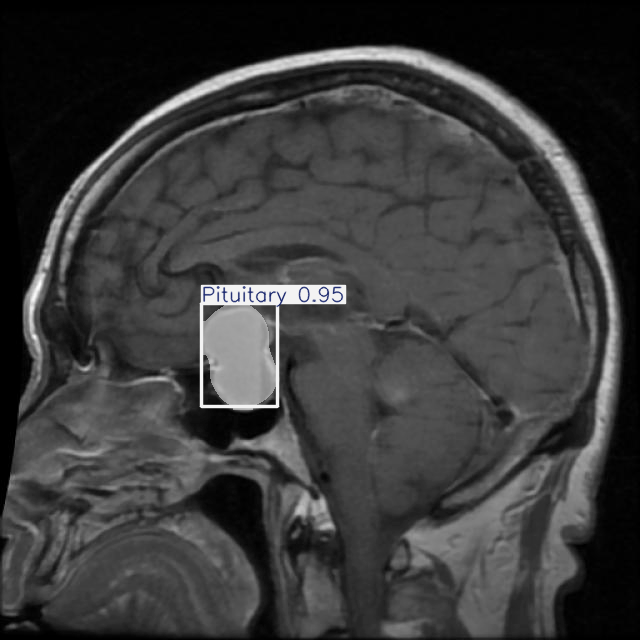

In [5]:
# Path to a test image
image_path = r"/kaggle/input/brats-instance-seg/test/images/1004_png.rf.7558975afb3881d25d1e95c4ebae5645.jpg"

# Run prediction
results = model(image_path)  

# Show prediction results
results[0].show()

# 6. Export the Model to ONNX Format 

In [6]:
# Export the model to ONNX format
path = model.export(format="onnx")  # Returns the path to the exported ONNX model

Ultralytics 8.3.156 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/segment/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 39, 8400), (1, 32, 160, 160)) (19.6 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 5.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.57...
ONNX: export success ✅ 9.1s, saved as 'runs/segment/train/weights/best.onnx' (38.7 MB)

Export complete (10.2s)
Results saved to /kaggle/working/runs/segment/train/weights
Predict:         yolo predict task=segment model=runs/segment/train/weights/best.onnx imgsz=640  
Validate:     